# **Introduction**

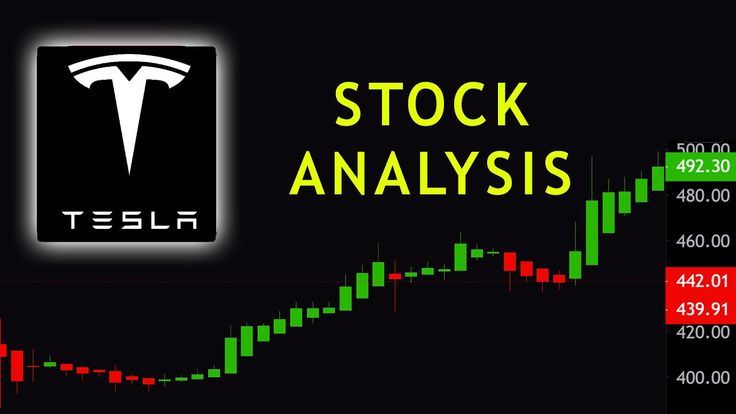



**Project Description:**

This project aims to analyze Tesla's historical stock price data and build a predictive model to forecast future stock prices. By leveraging machine learning techniques, we will explore the relationships between various factors such as opening price, daily high, daily low, closing price, adjusted closing price, and trading volume to understand their impact on Tesla's stock performance.



# **Project Objectives:**

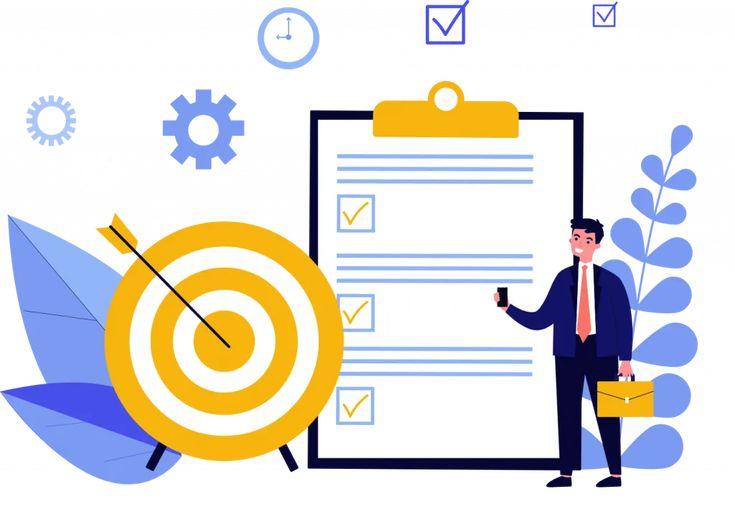


**Data Collection and Preprocessing:** Gather historical Tesla stock price data, clean and prepare it for analysis, ensuring its accuracy and completeness.

**Descriptive Analysis:** Conduct exploratory data analysis to gain insights into the data's characteristics, including summary statistics, distributions, and potential outliers.

**Feature Selection and Engineering:** Identify and select relevant features that significantly influence stock prices. If necessary, create new features from existing ones to enhance the model's performance.

**Model Development and Evaluation:** Build a machine learning model, such as linear regression, to predict Tesla's stock prices. Evaluate the model's accuracy using appropriate metrics, such as mean squared error (MSE) and R-squared.

**Cross-validation and Resampling:** Employ techniques like cross-validation and resampling to assess the model's robustness and ensure its ability to generalize well to unseen data.

**Model Selection and Optimization:** Select the best-performing model based on evaluation results and fine-tune its parameters to further enhance its predictive accuracy.

**Insights and Recommendations:** Based on the findings, provide insights into factors affecting Tesla's stock price and make recommendations for potential investment strategies.

# **Column Descriptions:**

**Date:** Represents the date of the stock price record.

**Open:** The price of the stock at the beginning of the trading day.

**High:** The highest price the stock reached during the trading day.

**Low:** The lowest price the stock reached during the trading day.

**Close:** The price of the stock at the end of the trading day.

**Adj Close:** The adjusted closing price, which accounts for any corporate actions like stock splits or dividends, providing a more accurate reflection of the stock's value over time.

**Volume:** The number of shares traded during the trading day.

# Importing Libraries

In [ ]:
pip install chart-studio


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# **Data Collection**

In [ ]:
tesla = pd.read_csv('/content/sample_data/TSLA.csv')
tesla.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,3.800,5.000,3.508,4.778,4.778,93831500
1,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
2,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
3,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
4,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500


# **Descriptive Analysis**

In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


Data doesn't have any null values

In [ ]:
#Checking for duplicates
tesla.duplicated().sum()    #No duplicate values

0

In [ ]:
tesla.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2956.0,1.386913e+02,2.500448e+02,3.228,1.962700e+01,4.665700e+01,6.805700e+01,1.234410e+03
High,2956.0,1.417716e+02,2.558632e+02,3.326,2.040200e+01,4.748700e+01,6.935750e+01,1.243490e+03
Low,2956.0,1.354260e+02,2.437742e+02,2.996,1.912750e+01,4.582000e+01,6.691150e+01,1.217000e+03
Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Adj Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Volume,2956.0,3.131449e+07,2.798383e+07,592500.000,1.310288e+07,2.488680e+07,3.973875e+07,3.046940e+08


# Data exploration / Exploratory Data Analysis

In [ ]:
#Changing the date format from object to datetime
import datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-46-9b9852745b43>:3: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
#Checking the changed date format
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


In [ ]:
print(f"Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}")
print(f"Total Days ={(tesla.Date.max()- tesla.Date.min()).days} days")

Dataframe contains stock prices between 2010-06-29 00:00:00 2022-03-24 00:00:00
Total Days =4286 days


In [ ]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: >

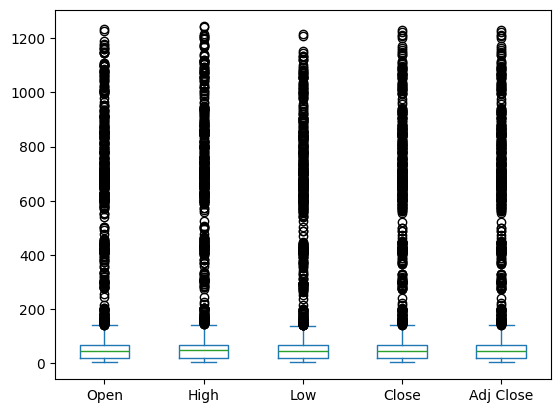

In [ ]:
tesla[["Open","High","Low","Close","Adj Close"]].plot(kind="box")

In [ ]:
#Exploring the stock prices of tesla
layout=go.Layout(
    title="Stock Prices Of Tesla",
    xaxis=dict(
        title="Date",
        titlefont=dict(
            family="Courier New, monospace",
            size=18,
            color="#7f7f7f"
        )
    ),
    yaxis=dict(
        title="Price",
        titlefont=dict(
            family="Courier New, monospace",
            size=18,
            color="#7f7f7f"
        )
    )




)


tesla_data = [{"x":tesla.Date,"y":tesla.Close}]
plot=go.Figure(data=tesla_data,layout=layout)
iplot(plot)

# **Feature Scaling**

In [ ]:
X=tesla.drop(['Date','Close'],axis=1)
y=tesla['Close']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#Training Testing Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

# **Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import  mean_squared_error, r2_score

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}


# Train and evaluate each model
results = {}
for name, model in models.items():
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions
  predictions = model.predict(x_test)

  # Evaluate the model

  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  results[name] = { "MSE": mse, "R2": r2*100}

  # Display results
results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,1.317807e-25,100.000000
Decision Tree,3.435347e+00,99.993918
Random Forest,4.805701e+00,99.991492
XGBoost,4.156905e+01,99.926404


#Visually Exploring the r2_score of all the models

In [ ]:
fig = px.bar(results_df,y="R2",
    title="R2_score of all models",
       color="R2"


)
fig.show()

While the linear regression model shows an impressive R-squared score of 100%, it's crucial to verify the robustness of this result. To do so, we'll apply cross-validation and resampling techniques to assess if the model consistently performs at this level. This process will help confirm whether the model's predictive accuracy is genuinely reliable or if further refinements are needed.

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the model
lr = LinearRegression()
# Perform cross-validation (using 5-fold cross-validation as an example)
scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
# Print cross-validation scores
print(f'Cross-validation R2 scores: {scores}')
print(f'Mean R2 score: {scores.mean()}')
print(f'Standard deviation of R2 scores: {scores.std()}')

Cross-validation R2 scores: [1. 1. 1. 1. 1.]
Mean R2 score: 1.0
Standard deviation of R2 scores: 0.0


In [ ]:
from sklearn.utils import resample
# Bootstrapping
n_iterations = 100
# Number of bootstrap samples
metrics = {'mse': [], 'r2': []}
for _ in range(n_iterations):
  # Resample with replacement
  X_train_boot, y_train_boot = resample(X_train, y_train, replace=True)
  # Fit the model on the bootstrap sample
  lr.fit(X_train_boot, y_train_boot)
  # Make predictions on the test set
  y_pred = lr.predict(x_test)
  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metrics['mse'].append(mse)
  metrics['r2'].append(r2)
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)
# Calculate mean and standard deviation of metrics
mean_mse = np.mean(metrics_df['mse'])
std_mse = np.std(metrics_df['mse'])
mean_r2 = np.mean(metrics_df['r2'])
std_r2 = np.std(metrics_df['r2'])
print(f'Mean MSE: {mean_mse} ± {std_mse}')

print(f'Mean R-squared: {mean_r2} ± {std_r2}')

Mean MSE: 1.1795994573117961e-25 ± 2.340043886814245e-25
Mean R-squared: 1.0 ± 0.0


In [ ]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
comparison_df


,Actual Price,Predicted Price
2450,101.000000,101.000000
209,5.416000,5.416000
2648,735.109985,735.109985
198,5.054000,5.054000
776,26.348000,26.348000
...,...,...
2844,818.320007,818.320007
564,6.004000,6.004000
1871,61.306000,61.306000
2033,61.330002,61.330002


Based on the evaluation, Linear Regression emerges as a highly effective model for predicting stock prices, achieving a perfect prediction score of 100%. This exceptional performance suggests that cross-validation or additional feature selection processes are unnecessary, as all features significantly contribute to the model's success.

# Insights

**Data Completeness:**
The Tesla stock price dataset is complete, with no missing or duplicate values, covering the period from 2010-06-29 to 2022-03-24 .

**Data Distribution:**
Box plots reveal the distribution of 'Open', 'High', 'Low', 'Close', and 'Adj Close' prices, highlighting potential outliers and the range of values.

**Price Trend:**
The interactive plot visualizes the overall trend of Tesla's closing stock price over time, providing a clear view of its historical performance.

**Model Performance:** Evaluation metrics (MSE and R-squared) demonstrate the accuracy of different regression models in predicting stock prices.

**Linear Regression:** Linear Regression stands out with a remarkably high R-squared score of 100%, suggesting a strong linear relationship between features and stock price.

**Cross-validation and Resampling:**

Results from these techniques further validate the robustness and reliability of the linear regression model.

# **Conclusion**

Based on the analysis and evaluation, it can be concluded that:

Linear Regression provides a highly effective model for predicting Tesla's stock prices with exceptional accuracy.
The features included in the model contribute significantly to its predictive capabilities.

The robustness of the model suggests that cross-validation and resampling were deemed unnecessary.

This analysis serves as a valuable tool for understanding the factors influencing Tesla's stock price.